In [40]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas as pd

In [41]:
def PrepareData(DIR_X, DIR_Y):
    df_x = pd.read_csv(DIR_X, sep=",", header=None)
    df_y = pd.read_csv(DIR_Y, sep=",", header=None)
    df_x = df_x.dropna(axis='columns')
    df_y = df_y.dropna(axis='columns')
    
    return df_x, df_y

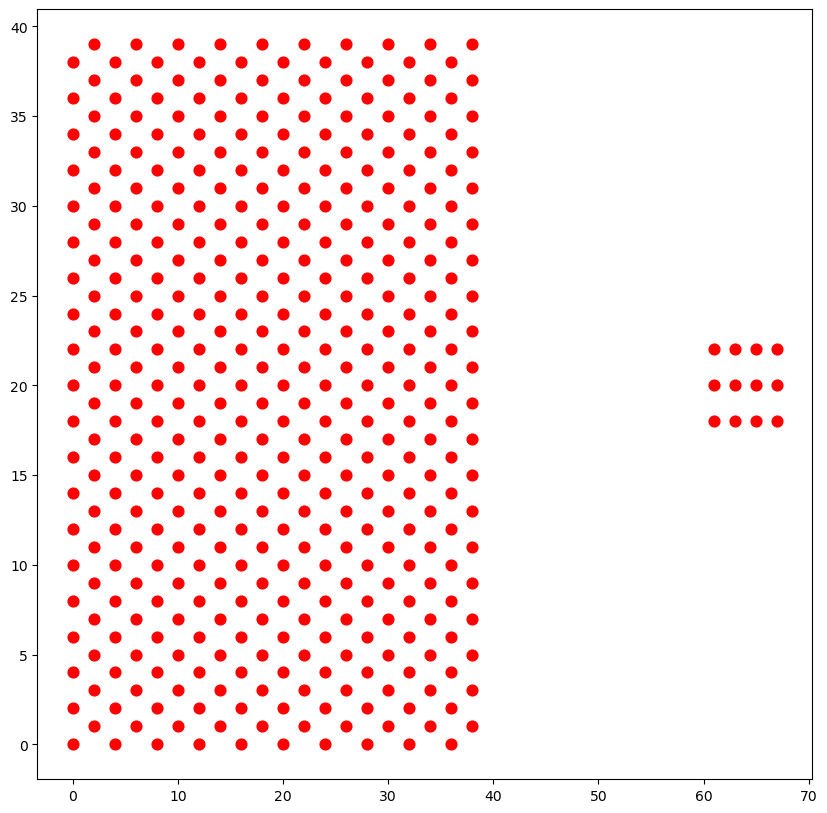

In [58]:
DIR_X = "D://Uni//11 semester//c++//ParticleMethod//MPI_particle_project//output//particles_list_x.txt"
DIR_Y = "D://Uni//11 semester//c++//ParticleMethod//MPI_particle_project//output//particles_list_y.txt"

df_x, df_y = PrepareData(DIR_X, DIR_Y)

mesh = 20
d = 2
mesh_size = mesh*d + 4


plt.close('all') # close all previous plot
fig, ax = plt.subplots(figsize=(10,10))

t = np.array(df_x.iloc[:,0])
x = np.array(df_x.iloc[0,1:])
y = np.array(df_y.iloc[0,1:])
l = plt.scatter(x, y, s= 10)
x_all = np.array(df_x.iloc[:,1:])
y_all = np.array(df_y.iloc[:,1:])

redDot = plt.scatter(x_all[0, np.newaxis], y_all[0, np.newaxis], c='r', s=60)
def animate(i):
    data = np.vstack((x_all[np.newaxis, i].reshape(-1), y_all[np.newaxis, i].reshape(-1))).transpose()
    redDot.set_offsets(data)
    return redDot,
# create animation using the animate() function
myAnimation = animation.FuncAnimation(fig, animate, frames=len(t), \
                                      interval=10, blit=True, repeat=True)

plt.show()

f = r"D://Uni//11 semester//c++//ParticleMethod//MPI_particle_project//output//animate_func.gif"
numDataPoints = len(np.linspace(0, 20, 100))
writergif = animation.PillowWriter(fps=numDataPoints/6)
myAnimation.save(f, writer=writergif)